In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Step 1: Download the CSV from Google Drive
file_id = "160bqL7ZpBImkucodCwQF9P4E8cly8tGw"
file_name = "Company_data.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

# Step 2: Load the CSV
df = pd.read_csv(file_name)
# Set pandas to display all columns in one line (horizontally scrollable in Colab)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

# Print with header
print("\nFirst 10 rows of the DataFrame:")
print(df.head(10))
df.shape

Downloading...
From: https://drive.google.com/uc?id=160bqL7ZpBImkucodCwQF9P4E8cly8tGw
To: /content/Company_data.csv
100%|██████████| 16.6k/16.6k [00:00<00:00, 30.4MB/s]


First 10 rows of the DataFrame:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   
5  10.81        124     113           13         501     72       Bad   78   
6   6.63        115     105            0          45    108    Medium   71   
7  11.85        136      81           15         425    120      Good   67   
8   6.54        132     110            0         108    124    Medium   76   
9   4.69        132     113            0         131    124    Medium   76   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3   

(400, 11)

In [2]:
# Step 1: Check for missing values
missing_rows = df[df.isnull().any(axis=1)]

# Step 2: Print rows and columns with missing values
if not missing_rows.empty:
    print("\nMissing values found in the following rows and features:\n")
    for idx, row in missing_rows.iterrows():
        missing_features = row[row.isnull()].index.tolist()
        print(f"Row {idx} is missing values in: {missing_features}")
    # Drop rows with missing values
    df = df.dropna()
    print(f"\nDropped {len(missing_rows)} rows with missing values.")
else:
    print("\nNo missing values found.")

# Step 3: Check for duplicate rows
duplicates = df[df.duplicated()]

# Step 4: Print duplicate row indices if any
if not duplicates.empty:
    print("\nDuplicate rows found:")
    print(duplicates)
    # Drop duplicate rows
    df = df.drop_duplicates()
    print(f"\nDropped {len(duplicates)} duplicate rows.")
else:
    print("\nNo duplicate rows found.")

# Step 5: Make a copy of the original DataFrame
df_encoded = df.copy()

# Step 6: Encode binary categorical columns
df_encoded['Urban'] = df_encoded['Urban'].map({'Yes': 1, 'No': 0})
df_encoded['US'] = df_encoded['US'].map({'Yes': 1, 'No': 0})

# Step 7: One-hot encode ShelveLoc
df_encoded = pd.get_dummies(df_encoded, columns=['ShelveLoc'], prefix='ShelveLoc')

# Step 8: Convert the one-hot encoded columns to integers (0 and 1 instead of True/False)
for col in df_encoded.columns:
    if col.startswith('ShelveLoc_'):
        df_encoded[col] = df_encoded[col].astype(int)

# Step 9: Show the shape and preview of the encoded DataFrame
print("\nShape of encoded DataFrame:", df_encoded.shape)
print("\nFirst 10 rows of the encoded DataFrame:")
print(df_encoded.head(10))
# Step 1: Calculate the mean of the Sales column
sales_mean = df_encoded['Sales'].mean()
print(f"\nMean Sales value: {sales_mean:.2f}")

# Step 2: Create a new column 'Sales_Class' based on the threshold
df_classified = df_encoded.copy()
df_classified['Sales_Class'] = df_classified['Sales'].apply(lambda x: 'High_sales' if x > sales_mean else 'Low_sales')

# Step 3: Optional - Preview class distribution
print("\nSales class distribution:")
print(df_classified['Sales_Class'].value_counts())

# Step 4: Preview the new DataFrame
print("\nFirst 10 rows of the classified DataFrame:")
print(df_classified.head(10))



No missing values found.

No duplicate rows found.

Shape of encoded DataFrame: (400, 13)

First 10 rows of the encoded DataFrame:
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   
5  10.81        124     113           13         501     72   78         16   
6   6.63        115     105            0          45    108   71         15   
7  11.85        136      81           15         425    120   67         10   
8   6.54        132     110            0         108    124   76         10   
9   4.69        132     113            0         131    124   76         17   


Correlation of numeric features with 'Sales':
ShelveLoc_Good      0.500510
Advertising         0.269507
US                  0.177093
Income              0.151951
CompPrice           0.064079
Population          0.050471
Urban              -0.015419
Education          -0.051955
ShelveLoc_Medium   -0.073999
Age                -0.231815
ShelveLoc_Bad      -0.393167
Price              -0.444951
Name: Sales, dtype: float64


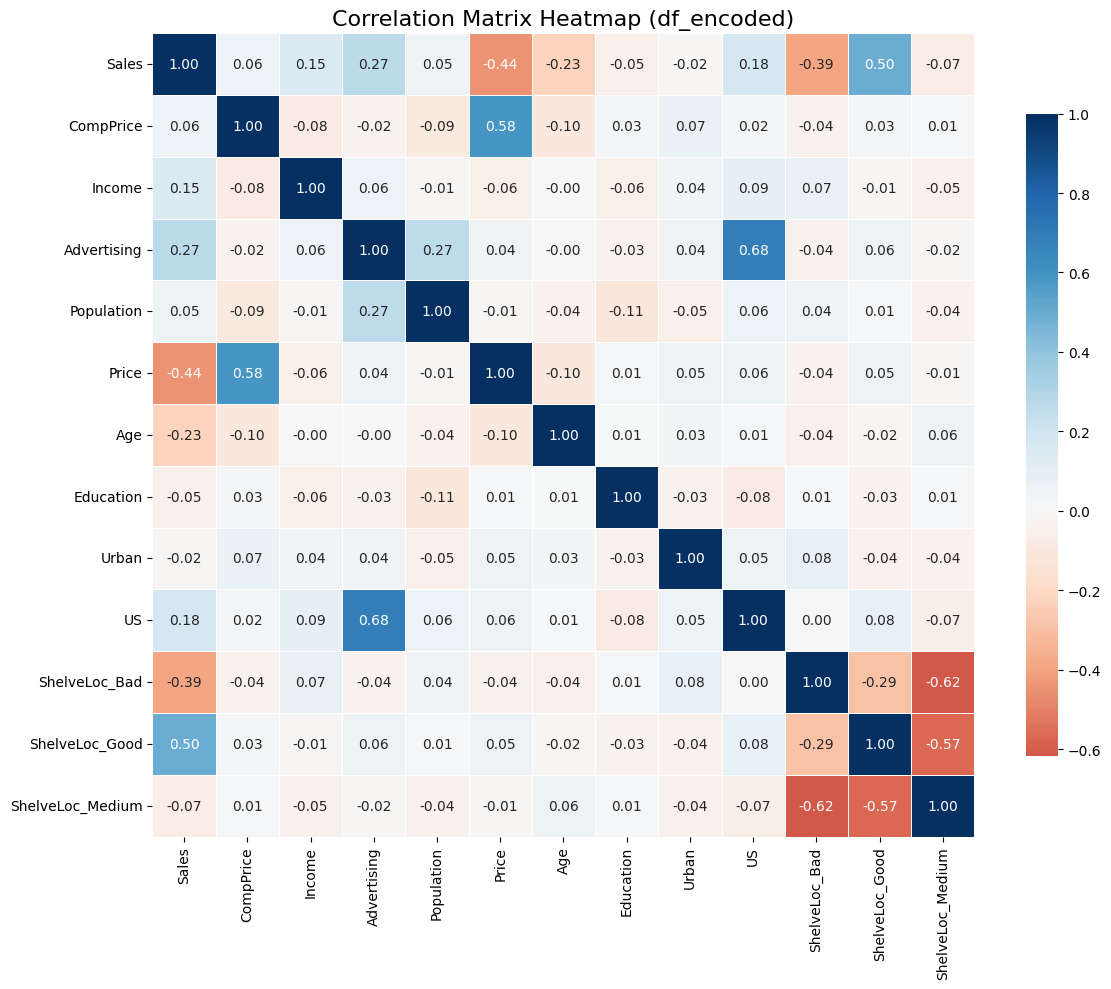

In [3]:

# Step 1: Select only numeric columns from the encoded DataFrame
numeric_features = df_encoded.select_dtypes(include=['number'])

# Step 2: Calculate Pearson correlation of each feature with the target 'Sales'
correlation_with_sales = numeric_features.corr()['Sales'].drop('Sales')

# Step 3: Sort the correlations in descending order (highest correlation first)
correlation_with_sales = correlation_with_sales.sort_values(ascending=False)

# Step 4: Display the result
print("\nCorrelation of numeric features with 'Sales':")
print(correlation_with_sales)

# Step 1: Select only numeric columns from df_encoded
numeric_features = df_encoded.select_dtypes(include=['number'])

# Step 2: Compute the full Pearson correlation matrix
correlation_matrix = numeric_features.corr()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is already defined in the session and cleaned properly
# Select only numeric columns
numeric_features = df_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Plot heatmap with red (-1) to blue (+1) colormap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap (df_encoded)", fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
# Step 1: Map 'Sales_Class' to numeric values (High_sales → 1, Low_sales → 0)
df_classified['Sales_Class_Num'] = df_classified['Sales_Class'].map({'High_sales': 1, 'Low_sales': 0})

# Step 2: Compute Pearson correlation between 'Sales' and numeric 'Sales_Class'
correlation = df_classified[['Sales', 'Sales_Class_Num']].corr().iloc[0, 1]

# Step 3: Print the result
print(f"Correlation between Sales and Sales_Class: {correlation:.4f}")

Correlation between Sales and Sales_Class: 0.8020


In [5]:
def calculate_entropy(y):
    # Step 1: Count occurrences of each class in y
    class_counts = np.bincount(y)

    # Step 2: Remove zero counts to avoid division/log issues
    class_probs = class_counts[class_counts > 0] / len(y)

    # Step 3: Compute entropy using the formula: -sum(p * log2(p))
    entropy = -np.sum(class_probs * np.log2(class_probs))

    return entropy
def info_gain(parent, children):
    # Step 1: Compute entropy of the parent set
    entropy_parent = calculate_entropy(parent)

    # Step 2: Compute weighted average entropy of children
    total_count = len(parent)
    weighted_entropy = 0

    for child in children:
        weight = len(child) / total_count
        entropy_child = calculate_entropy(child)
        weighted_entropy += weight * entropy_child

    # Step 3: Information gain is the reduction in entropy
    return entropy_parent - weighted_entropy


In [10]:
print("Columns in df_classified:")
print(df_classified.columns.tolist())


Columns in df_classified:
['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Sales_Class', 'Sales_Class_Num']


In [11]:
from sklearn.model_selection import train_test_split

# Step 1: Create a copy and drop the 'Sales' column
df_model = df_classified.copy()
df_model = df_model.drop(columns=['Sales'])

# Step 2: Separate features (X) and target (y), and drop 'Sales_Class_Num' if it exists
X = df_model.drop(columns=[col for col in ['Sales_Class', 'Sales_Class_Num'] if col in df_model.columns])
y = df_model['Sales_Class']

# Step 3: Split into training and test sets (e.g. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Optional - Show the size of the splits
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 320
Test set size: 80


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Create the base model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Cross-Validation Score: 0.784375


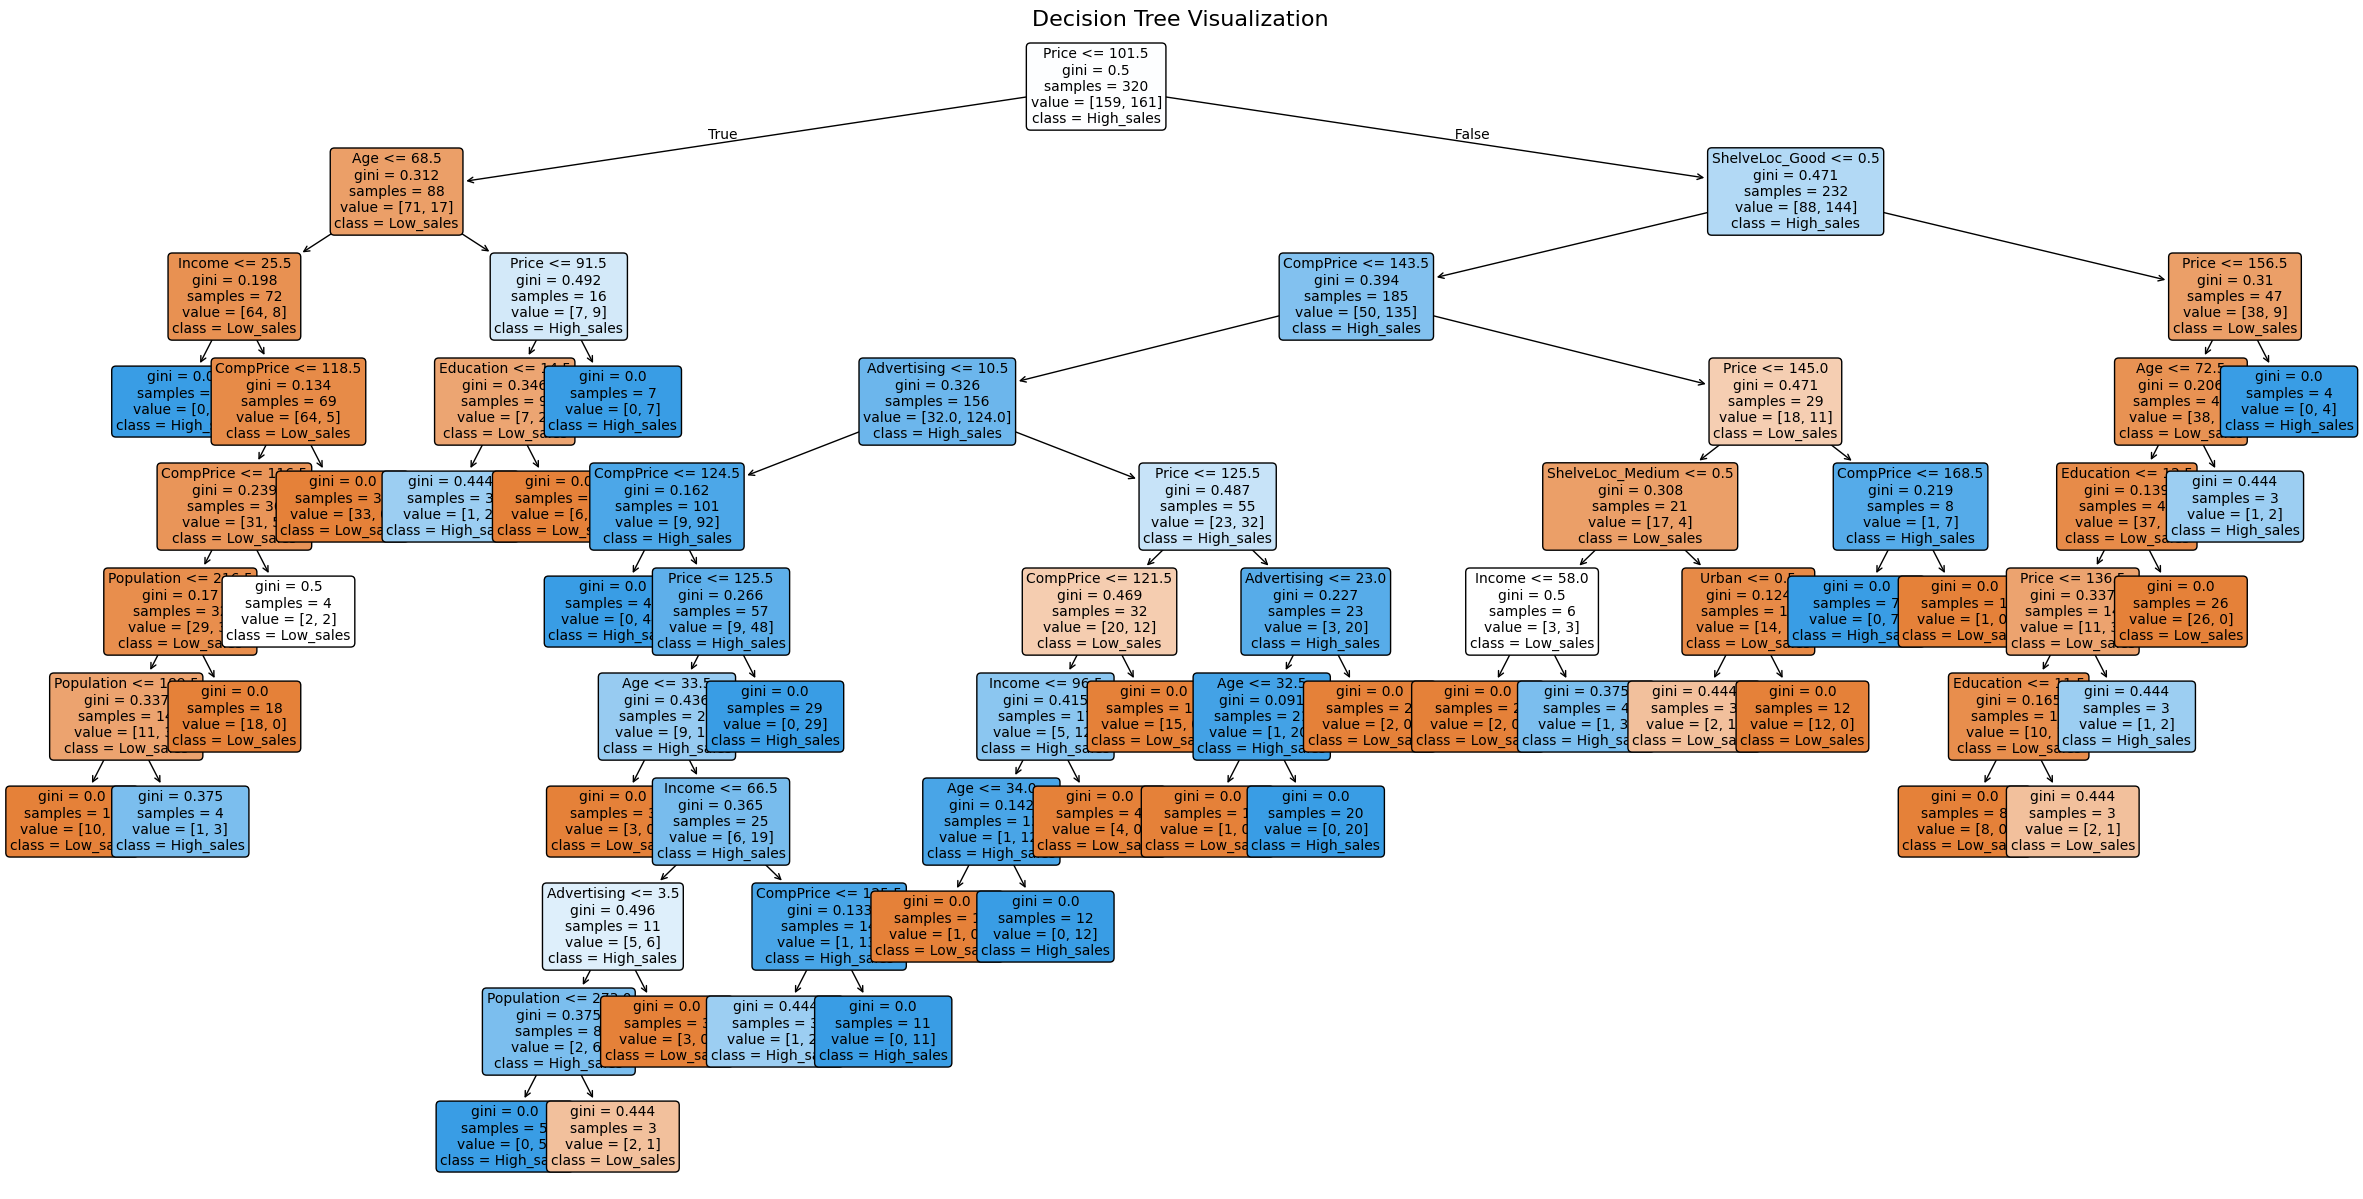

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Get the best trained decision tree model (from GridSearchCV)
best_model = grid_search.best_estimator_

# Step 2: Plot the decision tree
plt.figure(figsize=(30, 15))  # Adjust size as needed
plot_tree(best_model,
          feature_names=X_train.columns,   # Use your feature column names
          class_names=['Low_sales', 'High_sales'],  # Adjust if needed
          filled=True,        # Color nodes based on class
          rounded=True,       # Rounded boxes
          fontsize=10)        # Font size

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


Test Accuracy: 0.7

Classification Report:
              precision    recall  f1-score   support

  High_sales       0.69      0.72      0.71        40
   Low_sales       0.71      0.68      0.69        40

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



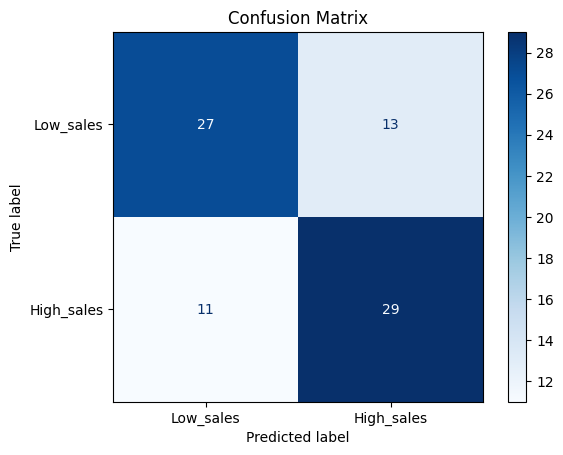

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# More detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low_sales', 'High_sales'])

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low_sales', 'High_sales'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
